In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
import numpy as np

In [ ]:
# Load dataset
file_path = "vehicle_emission_dataset.csv"
df = pd.read_csv(file_path)

In [ ]:
# Selecting relevant features
features = ["Vehicle Type", "Fuel Type", "Engine Size", "Age of Vehicle", "Mileage",
            "Speed", "Acceleration", "Road Type", "Traffic Conditions", "Temperature",
            "Humidity", "Wind Speed", "Air Pressure"]
targets = ["CO2 Emissions", "NOx Emissions", "PM2.5 Emissions", "VOC Emissions", "SO2 Emissions"]
classification_target = "Emission Level"

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in ["Vehicle Type", "Fuel Type", "Road Type", "Traffic Conditions", "Emission Level"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later decoding

In [ ]:
# Split data for emissions regression
X = df[features]
y = df[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a RandomForestRegressor for emissions
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate emissions
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 22.81195545835957


In [ ]:
print(y_pred)

[[2.29656547e+02 1.01221463e+00 9.82852709e-02 5.43608750e-02
  5.71132793e-02]
 [2.71627095e+02 1.02866978e+00 9.21922597e-02 4.97467277e-02
  5.59180523e-02]
 [2.83278802e+02 1.04522651e+00 1.04227522e-01 5.64051779e-02
  5.42953925e-02]
 ...
 [2.70492676e+02 1.00224255e+00 1.01095642e-01 5.01958887e-02
  5.43243048e-02]
 [2.83376290e+02 1.08124750e+00 1.25341580e-01 5.48627875e-02
  6.10208078e-02]
 [2.51006449e+02 1.08284878e+00 1.05503720e-01 5.49305514e-02
  5.07838061e-02]]


In [ ]:
# Train a RandomForestClassifier for emission level
X_class = df[features]
y_class = df[classification_target]
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)
classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)

In [ ]:
# Identify feature importance
feature_importances = regressor.feature_importances_
feature_importance_dict = dict(zip(features, feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

<ipython-input-14-34bdfd218aa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f[0] for f in sorted_features], y=[f[1] for f in sorted_features], palette='viridis')


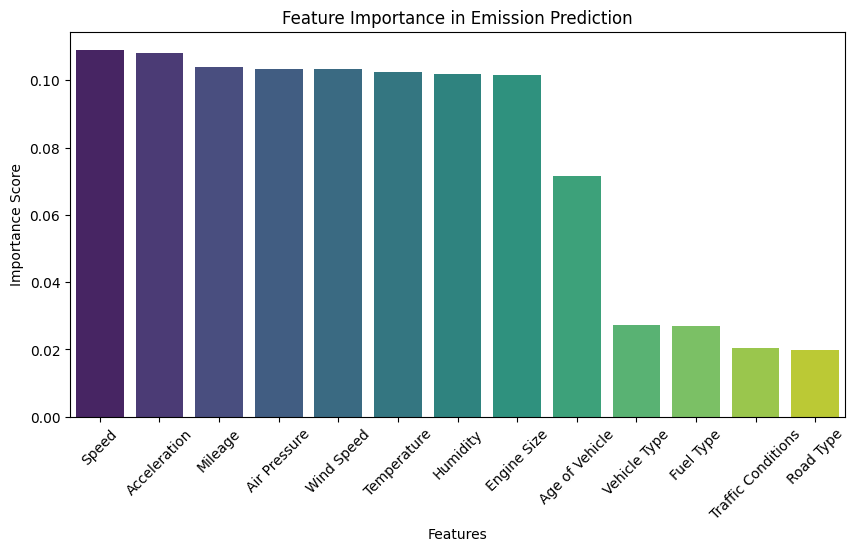

In [ ]:
# Visualization: Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=[f[0] for f in sorted_features], y=[f[1] for f in sorted_features], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Emission Prediction")
plt.show()

In [ ]:
# Extract top 3 contributing factors
top_contributors = [feature for feature, _ in sorted_features[:3]]
top_contributors

['Speed', 'Acceleration', 'Mileage']

In [ ]:
# Define precautionary recommendations
precautions = {
    "Engine Size": "Reduce engine displacement or optimize combustion efficiency.",
    "Fuel Type": "Promote alternative fuels like electric, hydrogen, or biofuels.",
    "Age of Vehicle": "Regular maintenance and replacement of old vehicles.",
    "Mileage": "Encourage fuel-efficient driving habits and route optimization.",
    "Speed": "Adopt speed limits to optimize fuel consumption and reduce emissions.",
    "Traffic Conditions": "Improve traffic management to reduce congestion-related emissions.",
    "Acceleration": "Avoid rapid acceleration to improve fuel efficiency.",
    "Wind Speed": "Aerodynamic vehicle designs can reduce wind resistance and emissions."
}

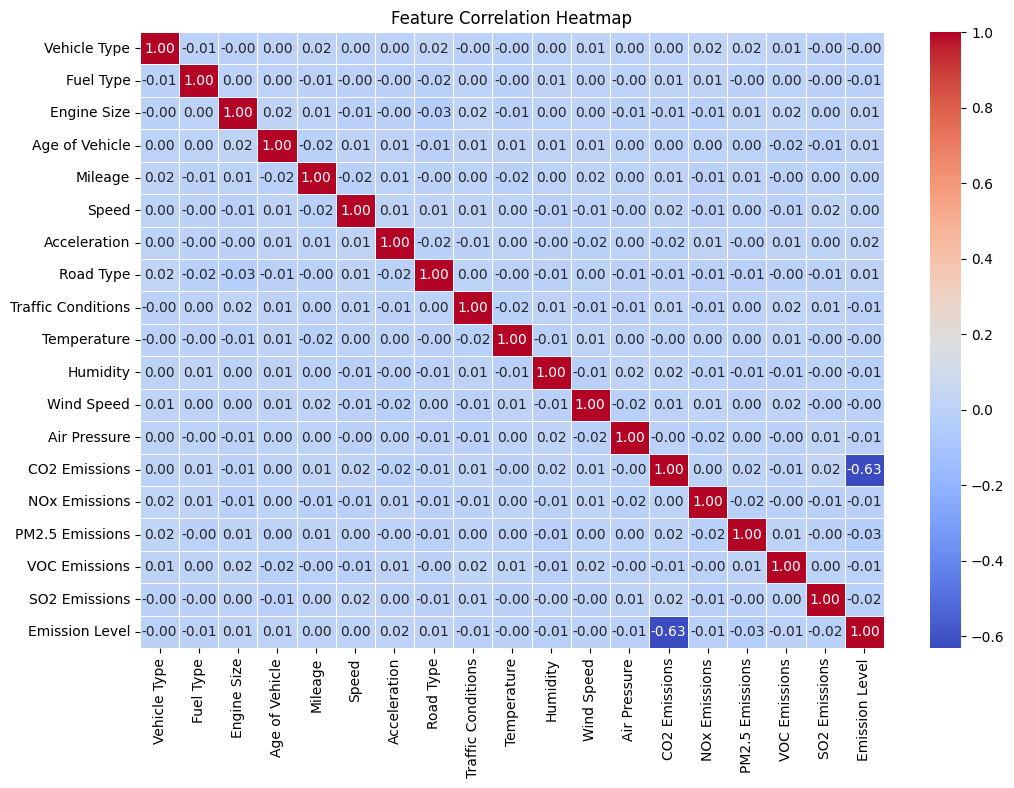

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Function to get recommendations and visualize key contributors
def get_recommendations_with_plot(sample_dict):
    # Convert sample_dict to DataFrame
    sample_df = pd.DataFrame([sample_dict])

    # Ensure categorical encoding matches training data
    for col, le in label_encoders.items():
        if col in sample_df:
            sample_df[col] = le.transform(sample_df[col])

    # Predict emissions
    predicted_emissions = regressor.predict(sample_df)[0]
    predicted_level = classifier.predict(sample_df)[0]
    predicted_level_label = label_encoders["Emission Level"].inverse_transform([predicted_level])[0]

    # Identify key contributing factors
    contributing_factors = [feature for feature, importance in sorted_features[:3]]
    recommendations = [precautions.get(factor, "No specific recommendation available.") for factor in contributing_factors]

    # Visualization: Key Contributing Factors
    plt.figure(figsize=(7, 4))
    sns.barplot(x=contributing_factors, y=[feature_importance_dict[f] for f in contributing_factors], palette='coolwarm')
    plt.xlabel("Factors")
    plt.ylabel("Impact Score")
    plt.title("Key Contributors to Emissions")
    plt.show()

    # Structured output
    print("\n=====================================================================================")
    print("  Emission Analysis and Recommendations  ")
    print("=====================================================================================\n")
    print("🔹 Sample Input:")
    for key, value in sample_dict.items():
        print(f"   {key}: {value}")

    print("\n🔹 Predicted Emissions:")
    for i, target in enumerate(targets):
        print(f"   {target}: {predicted_emissions[i]:.2f} g/km")

    print(f"\n🔹 Predicted Emission Level: {predicted_level_label}\n")
    print("🔹 Key Contributors to Emissions:")
    for idx, factor in enumerate(contributing_factors, 1):
        print(f"   {idx}. {factor}")

    print("\n🔹 Recommendations:")
    for idx, (factor, recommendation) in enumerate(zip(contributing_factors, recommendations), 1):
        print(f"   {idx}. {factor}: {recommendation}")
    print("\n=====================================================================================\n")

    return predicted_emissions, predicted_level_label, contributing_factors, recommendations

In [ ]:
# Sample input for testing
sample_input = {
    "Vehicle Type": "Bus",
    "Fuel Type": "Electric",
    "Engine Size": 3.5,
    "Age of Vehicle": 3,
    "Mileage": 35000,
    "Speed": 100,
    "Acceleration": 5,
    "Road Type": "Highway",
    "Traffic Conditions": "Moderate",
    "Temperature": 30,
    "Humidity": 45,
    "Wind Speed": 12,
    "Air Pressure": 1015
}

<ipython-input-18-aabd7335745d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contributing_factors, y=[feature_importance_dict[f] for f in contributing_factors], palette='coolwarm')


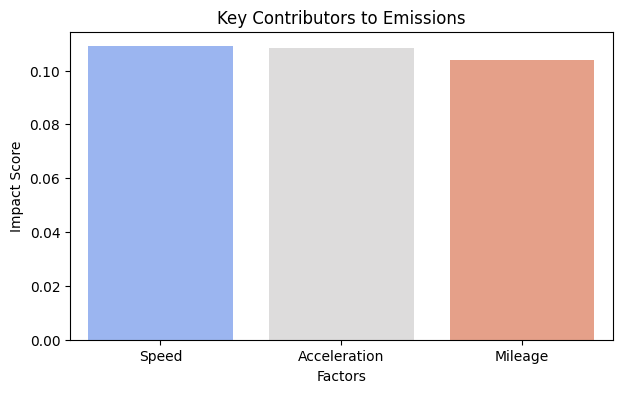


  Emission Analysis and Recommendations  

🔹 Sample Input:
   Vehicle Type: Bus
   Fuel Type: Electric
   Engine Size: 3.5
   Age of Vehicle: 3
   Mileage: 35000
   Speed: 100
   Acceleration: 5
   Road Type: Highway
   Traffic Conditions: Moderate
   Temperature: 30
   Humidity: 45
   Wind Speed: 12
   Air Pressure: 1015

🔹 Predicted Emissions:
   CO2 Emissions: 295.70 g/km
   NOx Emissions: 1.01 g/km
   PM2.5 Emissions: 0.10 g/km
   VOC Emissions: 0.05 g/km
   SO2 Emissions: 0.06 g/km

🔹 Predicted Emission Level: High

🔹 Key Contributors to Emissions:
   1. Speed
   2. Acceleration
   3. Mileage

🔹 Recommendations:
   1. Speed: Adopt speed limits to optimize fuel consumption and reduce emissions.
   2. Acceleration: Avoid rapid acceleration to improve fuel efficiency.
   3. Mileage: Encourage fuel-efficient driving habits and route optimization.




(array([2.95704689e+02, 1.01259782e+00, 9.94823176e-02, 5.07992575e-02,
        5.75011566e-02]),
 'High',
 ['Speed', 'Acceleration', 'Mileage'],
 ['Adopt speed limits to optimize fuel consumption and reduce emissions.',
  'Avoid rapid acceleration to improve fuel efficiency.',
  'Encourage fuel-efficient driving habits and route optimization.'])

In [ ]:
# Run updated function with sample input
get_recommendations_with_plot(sample_input)